# Load Data & Initial Exploration

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [51]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [52]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [53]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

In [54]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
NaN    350
No     284
Name: count, dtype: int64

# Convert Columns to Boolean

In [55]:
# Convert 'Have you seen any of the 6 films in the Star Wars franchise?' column

target_cols = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?',
]

# Change values from 'Yes'/'No' to True/False
for target_col in target_cols:
    star_wars[target_col] = star_wars[target_col].map({'Yes': True, 'No': False})

In [56]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64

In [57]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64

# Clean Checkbox Columns

In [58]:
# Check entry values in each column
watched_cols = star_wars.columns[3:9]

for col in watched_cols:
    print(star_wars[col].value_counts(dropna=False))

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: count, dtype: int64
Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: count, dtype: int64
Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: count, dtype: int64
Unnamed: 6
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: count, dtype: int64
Unnamed: 7
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: count, dtype: int64
Unnamed: 8
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: count, dtype: int64


In [59]:
# Convert watched columns to boolean
movie_names = [
    'Star Wars: Episode I  The Phantom Menace',
    'Star Wars: Episode II  Attack of the Clones',
    'Star Wars: Episode III  Revenge of the Sith',
    'Star Wars: Episode IV  A New Hope',
    'Star Wars: Episode V The Empire Strikes Back',
    'Star Wars: Episode VI Return of the Jedi',
]

for i in range(len(watched_cols)):
    star_wars[watched_cols[i]] = star_wars[watched_cols[i]].map({movie_names[i]: True, np.nan: False})

In [60]:
for col in watched_cols:
    print(star_wars[col].value_counts(dropna=False))

Which of the following Star Wars films have you seen? Please select all that apply.
True     673
False    513
Name: count, dtype: int64
Unnamed: 4
False    615
True     571
Name: count, dtype: int64
Unnamed: 5
False    636
True     550
Name: count, dtype: int64
Unnamed: 6
True     607
False    579
Name: count, dtype: int64
Unnamed: 7
True     758
False    428
Name: count, dtype: int64
Unnamed: 8
True     738
False    448
Name: count, dtype: int64


In [61]:
# Rename column names to a more readable format
for i in range(len(watched_cols)):
    star_wars.rename(columns={watched_cols[i]: f'seen_{i+1}'}, inplace=True)

In [62]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Clean Ranking Columns

In [63]:
# Change type to float
ranking_cols = star_wars.columns[9:15]

star_wars[ranking_cols] = star_wars[ranking_cols].astype(float)

# Rename columns into clearer format
for i in range(len(ranking_cols)):
    star_wars.rename(columns={ranking_cols[i]: f'ranking_{i+1}'}, inplace=True)

In [64]:
star_wars.iloc[:, 9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


# Find Highest Ranked Movie

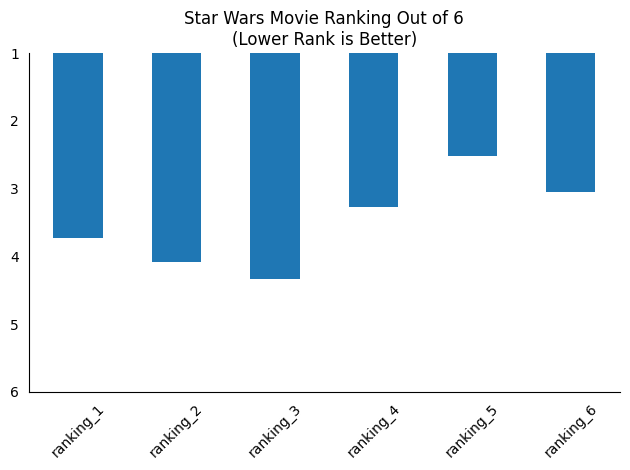

In [88]:
# Plot rankings on a bar graph

ranking_cols_new = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

star_wars[ranking_cols_new].mean().plot.bar()

plt.title('Star Wars Movie Ranking Out of 6\n(Lower Rank is Better)')

plt.xticks(rotation=45)

plt.ylim(5, 1)
plt.yticks([1, 2, 3, 4, 5, 6])

plt.tick_params(bottom=False, left=False)

plt.tight_layout()
sns.despine()

plt.savefig('visualizations/movie_rankings')

## Work Done:
- Cleaned the data (boolean columns)
- Renamed column names to more readable and interpretable naming schemes
- Plotted the rankings per movie

## Insights:
- The original trilogy fairs better in overall average rankings across this survey (Star Wars Episode IV through VI)
- Sequel trilogy decreses in overall ranking with each subsequent movie (Star Wars Episode I through III)